In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
import random
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kshort_pn_4GeV_Jun9_ntuple/*.root")

In [3]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x

kshort_pdgid = 310
chargedpion_pdgid = 211
pion_mass = 139
kshort_mass = 497.648

In [4]:
hists = {}      
hists["Target_pion_z"] = hist.Hist("Target SP Kaons",    
                                hist.Bin("z", r"z Position", 80, 0, 200),
                            ) 

In [5]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    target_kaon_dau1 = ldmx_events['TSP_Kaon_dau1']
    target_kaon_dau2 = ldmx_events['TSP_Kaon_dau2']
    
    mask_2dau2 = (target_kaon_dau2.gd==0)
    kshort_mask = (abs(target_kaon_dau2.mompdgID)==kshort_pdgid)
    pidau_mask = (abs(target_kaon_dau2.pdgID)==chargedpion_pdgid)

    pidau1 = target_kaon_dau1[pidau_mask & kshort_mask & mask_2dau2]
    pidau2 = target_kaon_dau2[pidau_mask & kshort_mask & mask_2dau2]
        
    #print((flat(pidau1.z)).shape)
    #print((flat(pidau2.z)).shape)
    pidauz =  np.append(flat(pidau1.z),flat(pidau2.z))
    #print(pidauz.shape)
    print(pidauz)
    hists["Target_pion_z"].fill(
                                 z=pidauz,
                                )
    
    
    return

In [6]:
nchunk = 0
for chunk in ldmx_dict:
    #if nchunk >= 1: break
    nchunk += 1
    print('process',nchunk)
    ProcessChunk(chunk, hists)

process 1
[ 2.826150e+01  2.826150e+01  4.577700e+00  4.577700e+00  2.826150e+01
  2.826150e+01  2.277700e+00  2.826150e+01  4.326150e+01  5.826150e+01
  4.326150e+01  5.826150e+01  5.826150e+01  2.277700e+00  1.832615e+02
  2.826150e+01  4.577700e+00  1.767000e-01  1.832615e+02  4.577700e+00
  2.826150e+01  4.577700e+00  2.826150e+01  1.326150e+01  4.326150e+01
  2.826150e+01  9.326150e+01  2.277700e+00  2.826150e+01  2.826150e+01
  5.826150e+01  2.277700e+00  2.277700e+00  2.826150e+01  2.277700e+00
  1.832615e+02  9.326150e+01  1.326150e+01  2.826150e+01  2.277700e+00
  4.326150e+01  2.277700e+00  1.767000e-01  2.826150e+01  1.832615e+02
  4.577700e+00  9.326150e+01  2.826150e+01  4.326150e+01  9.326150e+01
  4.326150e+01  1.832615e+02  1.832615e+02  9.326150e+01  5.826150e+01
  2.826150e+01  1.832615e+02  1.832615e+02  9.326150e+01  9.326150e+01
  5.826150e+01  1.832615e+02  1.832615e+02  1.832615e+02  2.826150e+01
  1.832615e+02  1.832615e+02  1.767000e-01  2.826150e+01  1.832615e

process 3
[ 4.326150e+01  4.326150e+01  1.832615e+02  4.326150e+01  4.577700e+00
  4.577700e+00  2.826150e+01  1.832615e+02  4.326150e+01  4.326150e+01
  9.326150e+01  1.832615e+02  4.326150e+01  5.826150e+01  1.767000e-01
  9.326150e+01  1.767000e-01  1.832615e+02  1.767000e-01  4.326150e+01
  2.277700e+00  1.832615e+02  5.826150e+01  4.326150e+01  9.326150e+01
  1.326150e+01  2.826150e+01  4.326150e+01  4.577700e+00  4.577943e+00
  4.326150e+01  2.826150e+01 -2.747000e-01  4.577700e+00  1.832615e+02
  1.832615e+02  5.826150e+01  2.826150e+01  1.832615e+02  1.832615e+02
  2.277700e+00  2.826150e+01  1.832615e+02  9.326150e+01  2.826150e+01
  2.277700e+00  1.832615e+02  2.826150e+01  2.826150e+01  2.277700e+00
  2.826150e+01  2.826150e+01  2.277700e+00  2.277700e+00  1.832615e+02
  1.767000e-01 -2.747000e-01  9.326150e+01  4.326150e+01  2.826150e+01
  9.326150e+01  4.577700e+00  2.826150e+01  9.326150e+01  2.826150e+01
  4.326150e+01  1.832615e+02  4.326150e+01 -2.747000e-01  2.826150e

process 5
[ 4.326150e+01  1.832615e+02  2.277700e+00  1.832615e+02  4.326150e+01
  9.326150e+01  2.277700e+00  2.277700e+00  4.326150e+01  2.826150e+01
  4.577700e+00  2.826150e+01  5.826150e+01  5.826150e+01  2.277700e+00
  4.326150e+01  1.832615e+02  9.326150e+01  1.832615e+02  9.326150e+01
  4.326150e+01  2.826150e+01  2.826150e+01  1.832615e+02  1.832615e+02
  4.577700e+00  5.826150e+01  4.577700e+00  1.326150e+01  2.826150e+01
  2.826150e+01  2.277700e+00  2.826150e+01  1.832615e+02  9.326150e+01
  2.826150e+01  2.277700e+00  2.277700e+00  4.577700e+00  1.832615e+02
  4.326150e+01  2.826150e+01  4.577700e+00  1.832615e+02  4.326150e+01
  4.326150e+01  2.826150e+01  5.826150e+01  2.277700e+00  4.577700e+00
  4.326150e+01  4.577700e+00  2.826150e+01 -2.574700e+00  1.832615e+02
  1.832615e+02  2.826150e+01  2.826150e+01  4.577700e+00  2.826150e+01
  1.767000e-01  5.826150e+01  1.832615e+02  9.326150e+01  1.767000e-01
  9.326150e+01  2.277700e+00  2.277700e+00  4.577700e+00  4.577700e

process 7
[ 4.577700e+00  4.326150e+01  4.326150e+01  5.826150e+01  2.826150e+01
  2.277700e+00 -2.574700e+00  4.326150e+01  2.826150e+01  2.826150e+01
  9.326150e+01  9.326150e+01  4.326150e+01  4.577700e+00  4.577700e+00
  4.326150e+01  2.826150e+01  4.326150e+01  4.326150e+01  2.826150e+01
  2.826150e+01  2.826150e+01  4.326150e+01  4.577700e+00  4.326150e+01
  4.326150e+01  9.326150e+01  4.326150e+01  1.767000e-01  1.767000e-01
 -1.767000e-01  4.326150e+01  2.277700e+00  4.326150e+01  1.832615e+02
  2.277700e+00  2.277700e+00  4.326150e+01  2.826150e+01  4.326150e+01
  2.826150e+01  1.767000e-01  4.577700e+00  4.326150e+01  2.826150e+01
  2.826150e+01  2.277700e+00  2.826150e+01  4.326150e+01  4.577700e+00
  5.826150e+01  2.826150e+01  5.826150e+01  2.826150e+01  9.326150e+01
  2.277700e+00  5.826150e+01  4.577700e+00  9.326150e+01  4.577700e+00
  1.767000e-01  2.277700e+00  2.277700e+00  9.326150e+01  1.832615e+02
  4.577700e+00  1.832615e+02  2.277700e+00 -2.574700e+00  1.832615e

process 9
[ 2.826150e+01  2.826150e+01  2.826150e+01  1.767000e-01  1.326150e+01
  4.326150e+01  1.832615e+02  2.826150e+01  2.826150e+01  4.577700e+00
  2.826150e+01  2.826150e+01  9.326150e+01  5.826150e+01  4.326150e+01
  4.326150e+01  9.326150e+01  4.577700e+00  9.326150e+01  4.326150e+01
  1.832615e+02  5.826150e+01  4.577700e+00  2.826150e+01  9.326150e+01
  9.326150e+01  9.326150e+01  2.826150e+01  1.832615e+02  2.826150e+01
  4.577700e+00  1.767000e-01  1.832615e+02  1.832615e+02  4.326150e+01
  2.277700e+00  9.326150e+01  4.326150e+01  9.326150e+01  9.326150e+01
  4.326150e+01  4.577700e+00  1.767000e-01  2.277700e+00  2.826150e+01
  1.832615e+02  5.826150e+01  9.326150e+01  5.826150e+01  9.326150e+01
  4.326150e+01  1.767000e-01  2.277700e+00  2.277700e+00  2.826150e+01
  2.826150e+01  2.277700e+00  2.277700e+00  9.326150e+01  4.326150e+01
  4.326150e+01  4.326150e+01  1.767000e-01  1.832615e+02  9.326150e+01
  2.826150e+01  2.826150e+01  2.277700e+00  1.832615e+02  1.832615e

process 11
[ 4.577700e+00  9.326150e+01  4.326150e+01  2.826150e+01  4.326150e+01
  9.326150e+01  2.826150e+01  9.326150e+01  4.326150e+01  2.826150e+01
  2.826150e+01  1.767000e-01  1.832615e+02  5.826150e+01  4.326150e+01
  1.832615e+02  4.326150e+01  2.277700e+00  2.277700e+00  4.326150e+01
  2.277700e+00  5.826150e+01  1.832615e+02  4.326150e+01  2.826150e+01
  9.326150e+01  4.326150e+01  4.326150e+01  4.577700e+00  1.832615e+02
  2.826150e+01  1.832615e+02  4.577700e+00  2.826150e+01  1.767000e-01
  4.577700e+00  2.826150e+01  2.826150e+01  2.277700e+00  4.577700e+00
  1.832615e+02  2.277700e+00  5.826150e+01  1.832615e+02  2.277700e+00
 -2.574700e+00  9.326150e+01  2.277700e+00  5.826150e+01  2.826150e+01
  2.277700e+00  2.826150e+01  9.326150e+01  2.277700e+00  4.326150e+01
  2.826150e+01  2.826150e+01  2.277700e+00  2.277700e+00  4.577700e+00
  1.767000e-01  9.326150e+01  5.826150e+01  2.277700e+00  1.832615e+02
  4.326150e+01  1.832615e+02  2.826150e+01  5.826150e+01  2.826150

process 13
[ 1.832615e+02  1.832615e+02  1.832615e+02  1.326150e+01  2.277700e+00
  2.277700e+00  2.826150e+01  1.832615e+02  2.826150e+01  1.326150e+01
  5.826150e+01  4.577700e+00  2.277700e+00  4.577700e+00  2.826150e+01
  2.826150e+01  4.577700e+00  1.832615e+02  2.277700e+00  1.326150e+01
  2.277700e+00  1.767000e-01  2.826150e+01  9.326150e+01  1.832615e+02
  4.326150e+01  2.277700e+00  1.767000e-01  1.832615e+02  2.277700e+00
  9.326150e+01  2.826150e+01  2.277700e+00  2.277700e+00  2.826150e+01
  4.326150e+01  2.826150e+01  1.832615e+02  1.767000e-01  4.326150e+01
 -2.747000e-01  5.826150e+01  2.826150e+01  4.326150e+01  4.577700e+00
  1.767000e-01  9.326150e+01  9.326150e+01  4.577700e+00  1.832615e+02
  2.826150e+01  1.767000e-01  1.767000e-01  9.326150e+01  9.326150e+01
  2.826150e+01  1.832615e+02  4.326150e+01  1.832615e+02  4.577700e+00
  4.326150e+01  4.577700e+00  4.326150e+01  4.326150e+01  5.826150e+01
  2.826150e+01  5.826150e+01  2.826150e+01  4.577700e+00  2.277700

process 15
[ 2.826150e+01  4.326150e+01  4.577700e+00 -2.747000e-01  4.577700e+00
  5.826150e+01  5.826150e+01  1.832615e+02  9.326150e+01  1.832615e+02
  9.326150e+01  5.826150e+01  1.832615e+02  1.832615e+02  5.826150e+01
  2.826150e+01  9.326150e+01 -2.574700e+00  2.277700e+00  2.826150e+01
  1.832615e+02  4.326150e+01  9.326150e+01  9.326150e+01  9.326150e+01
  4.326150e+01  5.826150e+01 -2.574700e+00  2.826150e+01  2.277700e+00
  5.826150e+01  1.832615e+02  9.326150e+01  2.826150e+01  2.826150e+01
  9.326150e+01  4.577700e+00  2.826150e+01  4.326150e+01  2.826150e+01
  2.826150e+01  2.826150e+01  9.326150e+01  4.326150e+01 -2.747000e-01
  1.832615e+02  2.277700e+00  4.326150e+01  2.826150e+01  2.826150e+01
  2.826150e+01  9.326150e+01  4.326150e+01  4.577700e+00  2.826150e+01
  2.826150e+01  4.326150e+01  2.277700e+00  4.577700e+00  9.326150e+01
  4.326150e+01  4.326150e+01  4.577700e+00  4.326150e+01  4.577700e+00
  5.826150e+01  2.826150e+01  4.577700e+00  9.326150e+01  2.826150

process 17
[ 2.826150e+01  2.277700e+00  9.326150e+01  1.832615e+02  5.826150e+01
  4.326150e+01  2.826150e+01  1.832615e+02  2.277700e+00  1.767000e-01
  9.326150e+01  1.832615e+02  2.826150e+01  2.826150e+01  2.277700e+00
 -2.747000e-01  2.277700e+00  2.826150e+01  1.767000e-01  1.832615e+02
  5.826150e+01  9.326150e+01  2.277700e+00  4.577700e+00  2.277700e+00
  1.832615e+02  4.326150e+01  4.577700e+00  4.326150e+01  4.326150e+01
  2.826150e+01  4.326150e+01  1.832615e+02  4.326150e+01  2.826150e+01
  4.326150e+01  2.826150e+01  1.767000e-01  4.577700e+00  9.326150e+01
  5.826150e+01  4.577700e+00  2.826150e+01  4.326150e+01  5.826150e+01
  9.326150e+01  2.826150e+01  2.826150e+01  9.326150e+01  5.826150e+01
  2.277700e+00  2.277700e+00  4.326150e+01  9.326150e+01  9.326150e+01
  9.326150e+01  4.326150e+01  1.767000e-01  5.826150e+01  9.326150e+01
  9.326150e+01  4.326150e+01  4.577700e+00  2.826150e+01  4.577700e+00
  4.577700e+00  2.826150e+01  2.826150e+01  1.832615e+02  1.767000

process 19
[ 2.826150e+01  1.326150e+01  9.326150e+01  1.832615e+02  2.277700e+00
  2.826150e+01  2.277700e+00  2.826150e+01  2.277700e+00  9.326150e+01
  1.832615e+02  2.826150e+01  9.326150e+01  2.826150e+01  4.326150e+01
  4.326150e+01  4.326150e+01  1.832615e+02  4.577700e+00  1.832615e+02
  2.277700e+00  2.277700e+00  9.326150e+01  1.767000e-01  4.577700e+00
  2.826150e+01  4.326150e+01  2.826150e+01  2.826150e+01  1.832615e+02
  1.832615e+02  9.326150e+01  4.326150e+01  2.826150e+01  2.277700e+00
  2.826150e+01  2.277700e+00  2.277700e+00  4.577700e+00  4.577700e+00
  9.326150e+01  2.826150e+01  2.826150e+01  1.832615e+02  9.326150e+01
  2.826150e+01  2.277700e+00  2.826150e+01  2.826150e+01  5.826150e+01
  5.826150e+01  1.832615e+02  2.277700e+00  1.832615e+02  2.826150e+01
  2.826150e+01  9.326150e+01  4.326150e+01  9.326150e+01  5.826150e+01
  2.826150e+01  9.326150e+01  4.577700e+00  4.326150e+01  5.826150e+01
  9.326150e+01  1.832615e+02  2.826150e+01  1.832615e+02  4.326150

process 21
[-2.574700e+00  1.832615e+02  4.577700e+00  2.826150e+01  9.326150e+01
  2.826150e+01  1.767000e-01  1.767000e-01  5.826150e+01  1.326150e+01
  2.277700e+00  2.826150e+01  2.826150e+01  5.826150e+01  2.277700e+00
 -2.747000e-01  4.326150e+01  2.826150e+01  1.832615e+02  2.826150e+01
  2.826150e+01  2.826150e+01  2.826150e+01  4.326150e+01  4.577700e+00
  4.577700e+00  2.826150e+01  1.767000e-01  1.832615e+02  9.326150e+01
  1.326150e+01  4.577700e+00  4.326150e+01  4.326150e+01  4.577700e+00
  4.326150e+01  2.277700e+00  4.326150e+01  2.826150e+01  5.826150e+01
  2.277700e+00  2.826150e+01  4.577700e+00  4.326150e+01  4.326150e+01
  2.277700e+00  1.832615e+02  2.826150e+01  5.826150e+01  2.277700e+00
  9.326150e+01  4.326150e+01  4.577700e+00  4.326150e+01  9.326150e+01
  2.826150e+01  4.577700e+00  5.826150e+01  4.326150e+01  2.826150e+01
  4.326150e+01  5.826150e+01  2.277700e+00  1.832615e+02  4.577700e+00
  4.326150e+01  4.326150e+01  2.826150e+01  1.832615e+02  4.326150

process 23
[ 1.326150e+01  2.277700e+00  4.326150e+01  4.577700e+00  2.826150e+01
  9.326150e+01  5.826150e+01  2.277700e+00  2.826150e+01  9.326150e+01
  2.826150e+01  2.826150e+01  9.326150e+01  2.826150e+01  5.826150e+01
  4.326150e+01  2.826150e+01  4.326150e+01  2.277700e+00  1.832615e+02
 -2.747000e-01  2.277700e+00  9.326150e+01  9.326150e+01  5.826150e+01
  1.832615e+02  9.326150e+01  2.826150e+01  4.577700e+00  2.277700e+00
  9.326150e+01  4.577700e+00  1.832615e+02  9.326150e+01  9.326150e+01
  2.277700e+00  4.326150e+01  2.826150e+01  2.826150e+01  2.826150e+01
  9.326150e+01  1.767000e-01  1.832615e+02  1.832615e+02  1.832615e+02
  2.826150e+01  1.832615e+02  2.826150e+01  9.326150e+01  1.832615e+02
  1.832615e+02  1.832615e+02  1.326150e+01  4.577700e+00  4.326150e+01
  2.826150e+01  5.826150e+01  4.326150e+01  4.326150e+01  4.326150e+01
  1.832615e+02  1.832615e+02  9.326150e+01  1.767000e-01  5.826150e+01
  4.577700e+00  2.826150e+01  2.277700e+00  1.326150e+01  2.826150

process 25
[ 5.826150e+01  4.577700e+00 -2.574700e+00  2.277700e+00  2.826150e+01
 -2.574700e+00  2.826150e+01  1.767000e-01  9.326150e+01  1.767000e-01
  2.826150e+01  2.826150e+01  4.326150e+01  2.826150e+01  2.826150e+01
  2.826150e+01  2.277700e+00  2.826150e+01  2.826150e+01  5.826150e+01
  2.826150e+01  1.767000e-01  2.826150e+01  2.826150e+01  4.326150e+01
  1.832615e+02  2.826150e+01  4.326150e+01  2.826150e+01  2.826150e+01
  2.826150e+01  2.826150e+01  2.277700e+00  4.326150e+01  9.326150e+01
  2.826150e+01  5.826150e+01  4.326150e+01  5.826150e+01  2.277700e+00
  1.767000e-01  2.826150e+01  4.326150e+01  2.826150e+01  5.826150e+01
  2.826150e+01  5.826150e+01  5.826150e+01  2.277700e+00  1.767000e-01
  2.826150e+01  5.826150e+01  2.826150e+01  4.326150e+01  1.832615e+02
  1.832615e+02  4.577700e+00  4.577700e+00  4.577700e+00  2.277700e+00
  4.326150e+01  4.577700e+00  2.826150e+01  1.767000e-01  4.326150e+01
  2.277700e+00  2.277700e+00  4.577700e+00  2.826150e+01  2.277700

[ 5.826150e+01  1.767000e-01  1.832615e+02  1.832615e+02  2.826150e+01
  9.326150e+01  1.832615e+02  9.326150e+01  2.277700e+00  9.326150e+01
  9.326150e+01  1.832615e+02  1.767000e-01  4.326150e+01  5.826150e+01
  4.577700e+00  2.277700e+00  2.277700e+00  2.826150e+01 -2.747000e-01
  4.326150e+01  9.326150e+01  4.577700e+00  2.826150e+01  2.277700e+00
  9.326150e+01  2.277700e+00  2.826150e+01  2.277700e+00  4.577700e+00
  2.277700e+00  1.767000e-01  2.826150e+01  4.326150e+01  1.832615e+02
  2.826150e+01  1.767000e-01  2.826150e+01  2.826150e+01  2.826150e+01
  4.577700e+00  2.277700e+00  2.826150e+01  2.277700e+00  2.826150e+01
  1.832615e+02  2.826150e+01  4.577700e+00  5.826150e+01  2.826150e+01
  2.277700e+00  1.832615e+02  2.277700e+00  5.826150e+01  2.277700e+00
  4.326150e+01  1.326150e+01  1.832615e+02  9.326150e+01  2.826150e+01
  2.277700e+00  5.826150e+01  4.326150e+01  1.832615e+02  2.826150e+01
  2.826150e+01  5.826150e+01  2.277700e+00  2.277700e+00  2.826150e+01
  2.82

[ 4.577700e+00  9.326150e+01  1.767000e-01  4.326150e+01  2.277700e+00
  4.577700e+00  4.577700e+00  9.326150e+01  1.832615e+02  9.326150e+01
  2.277700e+00  4.326150e+01  4.326150e+01  2.277700e+00  9.326150e+01
  4.326150e+01  4.326150e+01  1.832615e+02  2.826150e+01  9.326150e+01
  9.326150e+01  1.767000e-01  4.326150e+01  4.326150e+01  2.277700e+00
  1.832615e+02  4.577700e+00  2.277700e+00  1.767000e-01  2.277700e+00
  4.326150e+01  2.277700e+00  4.326150e+01  1.767000e-01  9.326150e+01
  2.277700e+00  4.577700e+00  4.577700e+00  1.832615e+02  5.826150e+01
  1.767000e-01  1.832615e+02  2.826150e+01  2.826150e+01  1.767000e-01
  9.326150e+01  4.577700e+00  2.277700e+00  2.277700e+00  5.826150e+01
  2.826150e+01  9.326150e+01  1.832615e+02  4.326150e+01  9.326150e+01
  4.326150e+01  2.826150e+01  5.826150e+01  1.832615e+02  9.326150e+01
  2.826150e+01  1.832615e+02  1.832615e+02  9.326150e+01  1.832615e+02
 -2.574700e+00  4.326150e+01  2.277700e+00  5.826150e+01  1.832615e+02
  2.27

[ 9.326150e+01  4.326150e+01  9.326150e+01  9.326150e+01  2.277700e+00
  4.326150e+01  2.826150e+01  5.826150e+01  9.326150e+01  4.326150e+01
  4.326150e+01  1.326150e+01 -2.574700e+00  4.577700e+00  2.277700e+00
  4.326150e+01  2.277700e+00  2.826150e+01  4.326150e+01  2.277700e+00
  2.826150e+01  4.577700e+00  5.826150e+01  4.577700e+00  2.826150e+01
  5.826150e+01  2.277700e+00  2.277700e+00  9.326150e+01  5.826150e+01
  5.826150e+01  9.326150e+01  2.277700e+00  2.826150e+01  2.826150e+01
  2.826150e+01 -2.574700e+00  1.832615e+02  2.277700e+00  9.326150e+01
  2.826150e+01  9.326150e+01 -2.747000e-01  1.832615e+02  4.326150e+01
  2.277700e+00  2.826150e+01  2.826150e+01  1.832615e+02  2.277700e+00
  2.826150e+01  9.326150e+01  2.277700e+00  2.826150e+01  1.326150e+01
  1.832615e+02  2.826150e+01  2.826150e+01  4.326150e+01  4.577700e+00
  4.577700e+00  2.277700e+00  4.577700e+00  1.832615e+02  1.767000e-01
  2.277700e+00  2.826150e+01  2.826150e+01  4.326150e+01  1.832615e+02
 -2.57

process 33
[ 9.326150e+01  1.767000e-01  5.826150e+01  4.326150e+01  2.826150e+01
  2.277700e+00  1.767000e-01  2.826150e+01  4.326150e+01  1.832615e+02
  1.832615e+02  4.577700e+00  4.326150e+01  2.826150e+01 -2.747000e-01
  1.832615e+02  2.826150e+01  1.767000e-01  1.767000e-01  1.832615e+02
  2.826150e+01  2.826150e+01  2.826150e+01  5.826150e+01  2.277700e+00
  2.277700e+00  4.326150e+01  1.832615e+02 -2.747000e-01  5.826150e+01
  2.826150e+01  9.326150e+01  4.326150e+01  5.826150e+01  2.826150e+01
  5.826150e+01  2.277700e+00  1.832615e+02  1.832615e+02  1.326150e+01
  9.326150e+01  4.577700e+00  1.767000e-01  4.577700e+00  4.577700e+00
  2.826150e+01  2.277700e+00  4.326150e+01  4.577700e+00  4.326150e+01
  5.826150e+01  1.832615e+02  2.826150e+01  1.767000e-01  1.767000e-01
  1.832615e+02  2.277700e+00  4.577700e+00  1.767000e-01  4.326150e+01
  2.277700e+00  2.826150e+01  5.826150e+01  4.326150e+01  2.826150e+01
  4.326150e+01  2.826150e+01  2.826150e+01  9.326150e+01  1.832615

process 35
[ 9.326150e+01  9.326150e+01  1.326150e+01  1.832615e+02  4.326150e+01
  9.326150e+01  5.826150e+01  5.826150e+01  2.826150e+01  1.832615e+02
  9.326150e+01  1.832615e+02  1.832615e+02  2.826150e+01  1.767000e-01
  9.326150e+01  4.577700e+00  2.277700e+00  2.277700e+00  1.767000e-01
  4.577700e+00  4.326150e+01  2.826150e+01  9.326150e+01  2.826150e+01
  1.326150e+01  1.832615e+02  4.326150e+01  9.326150e+01  9.326150e+01
  2.826150e+01  9.326150e+01  9.326150e+01  2.277700e+00  4.326150e+01
  2.277700e+00  1.767000e-01  2.826150e+01  9.326150e+01  9.326150e+01
  5.826150e+01  2.277700e+00  9.326150e+01  5.826150e+01  1.832615e+02
 -2.747000e-01  2.826150e+01  2.826150e+01  1.767000e-01  2.826150e+01
  2.826150e+01  1.767000e-01  4.326150e+01  4.577700e+00  4.326150e+01
  5.826150e+01  4.326150e+01  2.826150e+01  1.767000e-01  4.326150e+01
  2.826150e+01  2.826150e+01  1.832615e+02  4.326150e+01  1.832615e+02
  2.277700e+00  5.826150e+01  2.277700e+00  9.326150e+01  2.826150

process 37
[ 1.832615e+02  2.826150e+01 -2.747000e-01  9.326150e+01  9.326150e+01
  2.826150e+01  2.826150e+01  2.826150e+01  1.832615e+02  2.826150e+01
  5.826150e+01  4.326150e+01  9.326150e+01  2.826150e+01  4.326150e+01
  2.826150e+01  9.326150e+01  1.326150e+01  4.326150e+01  2.826150e+01
  9.326150e+01  4.326150e+01  2.826150e+01  4.577700e+00  1.767000e-01
  1.832615e+02  4.577700e+00  5.826150e+01  4.577700e+00  4.326150e+01
  2.277700e+00  2.826150e+01  4.326150e+01  4.577700e+00 -2.574700e+00
  2.826150e+01  5.826150e+01  2.826150e+01  9.326150e+01  1.832615e+02
  4.577700e+00  9.326150e+01  9.326150e+01  1.326150e+01  1.832615e+02
  4.326150e+01  1.767000e-01  2.277700e+00  2.277700e+00  9.326150e+01
 -2.574700e+00  4.326150e+01  2.826150e+01  1.767000e-01  5.826150e+01
  2.277700e+00  4.577700e+00 -2.574700e+00  4.326150e+01  4.326150e+01
  9.326150e+01  9.326150e+01  2.826150e+01  2.826150e+01  4.577700e+00
  1.832615e+02  2.277700e+00  1.832615e+02  4.326150e+01  1.832615

process 39
[ 1.767000e-01  2.826150e+01  9.326150e+01  4.326150e+01  5.826150e+01
  4.326150e+01  2.826150e+01  5.826150e+01  4.326150e+01  5.826150e+01
  1.832615e+02  4.326150e+01  2.277700e+00  2.826150e+01  2.826150e+01
 -2.574700e+00  4.577700e+00  2.826150e+01  1.832615e+02  9.326150e+01
  9.326150e+01  4.577700e+00  9.326150e+01  2.826150e+01  9.326150e+01
 -2.747000e-01  2.826150e+01  2.826150e+01  1.832615e+02  2.277700e+00
  5.826150e+01  1.326150e+01  4.326150e+01  4.326150e+01  9.326150e+01
  2.277700e+00  9.326150e+01  2.826150e+01  2.277700e+00  1.832615e+02
  2.826150e+01  2.826150e+01  4.577700e+00  2.277700e+00  4.326150e+01
  9.326150e+01  1.326150e+01  2.277700e+00  4.326150e+01  2.826150e+01
  2.826150e+01  9.326150e+01  1.832615e+02  1.832615e+02  9.326150e+01
  9.326150e+01  5.826150e+01  1.767000e-01  1.832615e+02  4.326150e+01
  4.326150e+01  1.832615e+02  4.326150e+01  2.826150e+01  2.826150e+01
  1.832615e+02  9.326150e+01  2.826150e+01  2.277700e+00  2.826150

process 41
[ 4.577700e+00  2.826150e+01  4.326150e+01  2.277700e+00  2.277700e+00
  4.326150e+01  5.826150e+01  2.277700e+00  5.826150e+01  2.826150e+01
  9.326150e+01  5.826150e+01  5.826150e+01  9.326150e+01  9.326150e+01
  2.826150e+01  9.326150e+01  1.832615e+02  1.767000e-01  9.326150e+01
  4.326150e+01  2.277700e+00  2.826150e+01  9.326150e+01  1.832615e+02
  9.326150e+01  1.767000e-01  2.277700e+00  2.826150e+01  1.832615e+02
  9.326150e+01  5.826150e+01  4.577700e+00  9.326150e+01 -2.747000e-01
  2.826150e+01  1.326150e+01  2.277700e+00  2.826150e+01  1.832615e+02
  4.326150e+01  9.326150e+01  2.826150e+01  5.826150e+01  4.326150e+01
  5.826150e+01  9.326150e+01  9.326150e+01  2.826150e+01  4.326150e+01
  2.826150e+01  5.826150e+01  2.826150e+01  2.277700e+00  2.826150e+01
  2.826150e+01  2.826150e+01  9.326150e+01  2.826150e+01  4.577700e+00
  2.277700e+00  4.577700e+00  2.277700e+00  2.826150e+01  2.826150e+01
  2.277700e+00  2.826150e+01  9.326150e+01  9.326150e+01  5.826150

process 43
[ 2.277700e+00  1.832615e+02  4.326150e+01  5.826150e+01  4.326150e+01
  4.577700e+00  4.577700e+00  2.277700e+00  2.826150e+01  2.826150e+01
  9.326150e+01 -2.574700e+00  9.326150e+01  2.277700e+00  2.826150e+01
  2.826150e+01  2.826150e+01  2.277700e+00  2.277700e+00  4.326150e+01
  2.826150e+01  5.826150e+01  9.326150e+01  4.326150e+01  2.277700e+00
  4.326150e+01  2.277700e+00  4.326150e+01  4.326150e+01  5.826150e+01
  2.826150e+01  4.577700e+00  4.326150e+01  5.826150e+01  4.326150e+01
  1.832615e+02  2.277700e+00  1.832615e+02  2.826150e+01  2.277700e+00
  2.826150e+01  2.826150e+01  4.577700e+00  2.277700e+00  9.326150e+01
  2.826150e+01  9.326150e+01  2.277700e+00  4.577700e+00  5.826150e+01
  4.577700e+00  2.826150e+01  5.826150e+01  2.826150e+01  5.826150e+01
  2.826150e+01  2.826150e+01  2.277700e+00  1.767000e-01  2.826150e+01
  9.326150e+01  9.326150e+01  9.326150e+01  9.326150e+01  2.826150e+01
  4.577700e+00  9.326150e+01  4.326150e+01  2.826150e+01 -2.747000

process 45
[ 4.577700e+00  1.767000e-01  1.832615e+02  4.326150e+01  1.832615e+02
  1.832615e+02  1.832615e+02  5.826150e+01  4.326150e+01  2.826150e+01
  2.826150e+01  2.277700e+00  2.826150e+01  4.577700e+00  4.326150e+01
  1.326150e+01  2.826150e+01  4.326150e+01  5.826150e+01  4.577700e+00
  1.767000e-01  4.577700e+00  1.832615e+02  5.826150e+01  2.277700e+00
  4.577700e+00  4.326150e+01  1.832615e+02  4.577700e+00  4.326150e+01
  5.826150e+01  1.767000e-01  9.326150e+01  2.277700e+00  9.326150e+01
  2.826150e+01  2.826150e+01  4.577700e+00  2.277700e+00  2.826150e+01
  5.826150e+01  2.826150e+01  1.326150e+01  2.826150e+01 -2.747000e-01
  4.326150e+01  5.826150e+01  2.826150e+01  2.826150e+01  2.826150e+01
  4.326150e+01  4.326150e+01  4.577700e+00  1.832615e+02  5.826150e+01
  2.826150e+01  1.832615e+02  4.577700e+00  2.826150e+01  4.326150e+01
  9.326150e+01  5.826150e+01  2.826150e+01  2.826150e+01  4.577700e+00
  4.326150e+01  4.326150e+01  2.826150e+01  4.577700e+00  2.277700

process 47
[ 2.826150e+01  4.577700e+00  2.277700e+00  2.277700e+00  4.326150e+01
  2.826150e+01  2.277700e+00  2.826150e+01  4.577700e+00  2.826150e+01
  2.826150e+01  2.826150e+01  2.826150e+01  9.326150e+01  4.326150e+01
  2.826150e+01  5.826150e+01  4.326150e+01  4.326150e+01  4.577700e+00
 -2.574700e+00  2.277700e+00  4.326150e+01  9.326150e+01  2.277700e+00
  1.832615e+02  2.826150e+01  1.832615e+02  4.577700e+00  4.326150e+01
  9.326150e+01  2.277700e+00  1.832615e+02  1.767000e-01  9.326150e+01
  2.826150e+01  5.826150e+01  2.277700e+00  4.326150e+01  1.832615e+02
  2.826150e+01  4.577700e+00  1.767000e-01  1.767000e-01  2.826150e+01
  2.277700e+00  2.826150e+01  2.826150e+01  1.832615e+02  2.826150e+01
  1.832615e+02  9.326150e+01  9.326150e+01  1.767000e-01  9.326150e+01
  1.832615e+02  2.826150e+01  5.826150e+01  4.577700e+00  2.826150e+01
  4.326150e+01  1.832615e+02  5.826150e+01  1.832615e+02  9.326150e+01
  2.277700e+00  1.767000e-01  9.326150e+01  4.577700e+00  9.326150

process 49
[ 2.277700e+00  1.832615e+02  4.326150e+01  2.277700e+00  4.326150e+01
  4.326150e+01  2.277700e+00  9.326150e+01  1.832615e+02  2.826150e+01
  9.326150e+01  4.577700e+00  5.826150e+01  2.277700e+00  4.326150e+01
  2.826150e+01  4.326150e+01  1.832615e+02  2.277700e+00  1.767000e-01
  2.826150e+01 -2.574700e+00  2.277700e+00  2.277700e+00  2.277700e+00
  1.832615e+02  1.832615e+02  2.277700e+00  9.326150e+01  4.326150e+01
  1.832615e+02  4.326150e+01  1.767000e-01  4.577700e+00  1.767000e-01
  1.767000e-01  2.826150e+01  9.326150e+01  4.326150e+01  2.826150e+01
  2.826150e+01  2.826150e+01  2.826150e+01  4.326150e+01  2.826150e+01
  4.326150e+01  2.826150e+01  1.767000e-01  4.326150e+01  4.577700e+00
  1.767000e-01  1.832615e+02  2.826150e+01 -1.767000e-01  2.826150e+01
  2.826150e+01  2.277700e+00  4.577700e+00  1.832615e+02  9.326150e+01
  1.832615e+02  4.326150e+01  2.826150e+01  4.326150e+01  4.326150e+01
  4.577700e+00  2.826150e+01  1.767000e-01  1.767000e-01  2.277700

process 51
[ 9.326150e+01  4.577700e+00  2.826150e+01  2.826150e+01  4.326150e+01
  1.832615e+02  1.832615e+02  9.326150e+01  2.826150e+01  2.826150e+01
  9.326150e+01  2.826150e+01  9.326150e+01  1.832615e+02  1.832615e+02
  9.326150e+01  5.826150e+01  2.277700e+00 -2.574700e+00  4.326150e+01
  1.832615e+02  1.767000e-01  4.326150e+01  2.277700e+00  2.826150e+01
  9.326150e+01  4.326150e+01  1.767000e-01  1.767000e-01 -2.574700e+00
  4.326150e+01  2.277700e+00  9.326150e+01  4.326150e+01  9.326150e+01
  2.277700e+00  2.277700e+00  1.832615e+02  2.826150e+01  4.326150e+01
  5.826150e+01  9.326150e+01  4.577700e+00  2.277700e+00  4.326150e+01
 -2.574700e+00  2.826150e+01  1.832615e+02  9.326150e+01  4.326150e+01
  1.767000e-01  4.577700e+00  1.767000e-01  1.832615e+02  2.277700e+00
  1.767000e-01  9.326150e+01  1.767000e-01  2.826150e+01  9.326150e+01
  4.326150e+01  9.326150e+01  2.277700e+00  4.577700e+00  2.277700e+00
  2.277700e+00  4.577700e+00  4.577700e+00  2.277700e+00  1.832615

process 53
[ 1.832615e+02  1.832615e+02  1.832615e+02  4.326150e+01  2.826150e+01
  9.326150e+01  2.826150e+01  2.826150e+01  1.832615e+02  2.826150e+01
  2.826150e+01  2.826150e+01  4.577700e+00  1.326150e+01  2.826150e+01
  4.326150e+01  1.832615e+02  1.767000e-01  9.326150e+01  1.326150e+01
  4.326150e+01  2.826150e+01  2.277700e+00  4.326150e+01  1.832615e+02
  9.326150e+01  2.826150e+01  5.826150e+01  9.326150e+01  1.832615e+02
  9.326150e+01  1.832615e+02  1.832615e+02  9.326150e+01  2.826150e+01
 -2.747000e-01  2.826150e+01  4.577700e+00  9.326150e+01  9.326150e+01
  2.826150e+01  2.277700e+00  2.277700e+00  2.826150e+01  1.832615e+02
  1.767000e-01  2.826150e+01  5.826150e+01  4.326150e+01  9.326150e+01
  2.277700e+00  1.767000e-01  2.826150e+01  1.832615e+02  4.577700e+00
  2.277700e+00  1.832615e+02  2.826150e+01  2.277700e+00  1.767000e-01
  9.326150e+01  1.832615e+02  4.326150e+01  4.326150e+01  1.326150e+01
  2.826150e+01 -2.747000e-01  9.326150e+01  1.767000e-01  4.326150

process 55
[ 2.277700e+00  1.832615e+02  9.326150e+01  5.826150e+01  1.832615e+02
  4.577700e+00  9.326150e+01  5.826150e+01  4.577700e+00  2.826150e+01
  4.326150e+01  1.832615e+02  9.326150e+01  2.826150e+01  1.832615e+02
  4.326150e+01  5.826150e+01  1.832615e+02  1.832615e+02  1.832615e+02
  9.326150e+01  9.326150e+01  1.832615e+02  1.832615e+02  1.326150e+01
  5.826150e+01  2.277700e+00  1.767000e-01  2.826150e+01  4.326150e+01
  4.577700e+00  4.326150e+01  2.826150e+01  4.577700e+00  4.326150e+01
  2.277700e+00  5.826150e+01  2.826150e+01  5.826150e+01  5.826150e+01
  2.826150e+01  4.326150e+01 -2.747000e-01  2.826150e+01  1.832615e+02
  2.277700e+00  2.826150e+01  2.826150e+01  4.577700e+00  2.826150e+01
  9.326150e+01  9.326150e+01  4.577700e+00  9.326150e+01  9.326150e+01
  4.326150e+01  2.277700e+00  2.826150e+01  2.826150e+01  2.826150e+01
  1.832615e+02  2.277700e+00  5.826150e+01  4.577700e+00  1.832615e+02
  2.277700e+00  2.826150e+01  2.826150e+01  4.577700e+00  4.577700

process 57
[ 4.326150e+01  4.326150e+01  9.326150e+01 -2.574700e+00  2.826150e+01
  5.826150e+01  4.577700e+00  2.826150e+01  2.826150e+01 -2.574700e+00
  9.326150e+01  2.826150e+01  4.577700e+00  2.826150e+01  4.577700e+00
  2.277700e+00  4.577700e+00  1.832615e+02  2.826150e+01  9.326150e+01
  4.577700e+00  1.832615e+02  2.277700e+00  2.826150e+01  2.277700e+00
 -2.574700e+00  2.826150e+01  1.767000e-01  2.277700e+00  5.826150e+01
  4.326150e+01  2.277700e+00  9.326150e+01  2.277700e+00  2.277700e+00
  9.326150e+01  1.832615e+02  2.826150e+01  1.832615e+02  2.826150e+01
  9.326150e+01  4.577700e+00 -1.767000e-01  2.826150e+01  5.826150e+01
  9.326150e+01  2.277700e+00  2.826150e+01  4.326150e+01  1.832615e+02
  2.826150e+01  2.826150e+01  2.826150e+01  5.826150e+01  1.832615e+02
  4.326150e+01  2.277700e+00  9.326150e+01  1.767000e-01  5.826150e+01
  2.826150e+01  5.826150e+01  4.326150e+01  1.832615e+02  1.832615e+02
  1.767000e-01  1.832615e+02  1.832615e+02  2.277700e+00  2.826150

process 59
[ 1.832615e+02  5.826150e+01  2.277700e+00  1.832615e+02  2.826150e+01
  2.277700e+00  1.832615e+02 -2.574700e+00  4.326150e+01  2.277700e+00
  9.326150e+01  4.326150e+01  1.832615e+02  9.326150e+01  2.826150e+01
  4.326150e+01  2.277700e+00  2.826150e+01  2.826150e+01  4.326150e+01
  4.577700e+00  2.826150e+01  4.326150e+01  5.826150e+01  4.326150e+01
  4.326150e+01  4.577700e+00  4.577700e+00  1.767000e-01  1.832615e+02
  2.826150e+01  4.577700e+00  9.326150e+01  9.326150e+01  4.577700e+00
  9.326150e+01  2.277700e+00  2.826150e+01  9.326150e+01  2.826150e+01
  1.832615e+02  1.832615e+02  4.326150e+01  2.826150e+01  1.767000e-01
  4.326150e+01  9.326150e+01  9.326150e+01  2.826150e+01  1.832615e+02
  2.826150e+01  2.826150e+01  2.826150e+01  2.826150e+01  1.326150e+01
  2.277700e+00  9.326150e+01  1.832615e+02  2.826150e+01  9.326150e+01
  5.826150e+01  5.826150e+01  2.826150e+01  9.326150e+01  4.326150e+01
  2.277700e+00  2.826150e+01  1.832615e+02  9.326150e+01  2.826150

process 61
[-2.574700e+00  5.826150e+01  1.832615e+02  1.767000e-01  5.826150e+01
  9.326150e+01  4.577700e+00  2.826150e+01  2.826150e+01  4.577700e+00
  2.277700e+00  9.326150e+01  2.826150e+01  2.277700e+00  2.826150e+01
  2.826150e+01  4.326150e+01  2.826150e+01  2.826150e+01  5.826150e+01
  1.832615e+02  1.832615e+02  2.277700e+00  2.826150e+01  1.767000e-01
  2.826150e+01  2.277700e+00  4.326150e+01  5.826150e+01  9.326150e+01
  2.277700e+00  1.832615e+02  1.832615e+02  9.326150e+01  4.577700e+00
  2.826150e+01  5.826150e+01  2.826150e+01  2.826150e+01  9.326150e+01
  4.326150e+01  2.277700e+00  2.826150e+01  2.826150e+01  1.767000e-01
  4.326150e+01  4.577700e+00  9.326150e+01  4.577700e+00  9.326150e+01
  4.326150e+01  2.277700e+00  1.832615e+02  1.832615e+02  4.326150e+01
  2.277700e+00  4.326150e+01  5.826150e+01 -2.747000e-01  4.326150e+01
  4.577700e+00  2.277700e+00  1.832615e+02  9.326150e+01  2.826150e+01
  4.577700e+00  9.326150e+01  1.832615e+02  4.326150e+01  2.826150

process 63
[ 2.826150e+01 -2.574700e+00  9.326150e+01  1.767000e-01  2.277700e+00
  9.326150e+01  9.326150e+01  2.826150e+01  1.767000e-01  4.326150e+01
  5.826150e+01  4.577700e+00  1.832615e+02  4.577700e+00  9.326150e+01
  9.326150e+01  2.826150e+01  1.326150e+01  4.577700e+00  1.832615e+02
  2.277700e+00  9.326150e+01  2.826150e+01  4.326150e+01  4.326150e+01
  9.326150e+01  2.277700e+00  4.326150e+01  4.326150e+01  4.577700e+00
  9.326150e+01  2.277700e+00  2.277700e+00  4.326150e+01  4.326150e+01
  4.326150e+01  2.826150e+01  5.826150e+01  2.277700e+00  4.326150e+01
  2.277700e+00  2.826150e+01  4.326150e+01  4.326150e+01  2.277700e+00
  2.826150e+01  9.326150e+01  2.826150e+01  4.326150e+01  2.277700e+00
  4.577700e+00  2.826150e+01  2.826150e+01  2.826150e+01  2.277700e+00
  4.326150e+01  1.832615e+02  4.577700e+00  2.826150e+01  1.832615e+02
  9.326150e+01  1.832615e+02  4.326150e+01  1.832615e+02  9.326150e+01
  2.277700e+00  4.326150e+01  4.577700e+00  2.277700e+00  9.326150

process 65
[ 5.8261501e+01  4.3261501e+01  2.8261499e+01  2.8261499e+01
  9.3261497e+01  2.8261499e+01  5.8261501e+01  2.8261499e+01
  4.5777001e+00  2.2776999e+00  4.5777001e+00  4.3261501e+01
  4.5777001e+00  4.5777001e+00  4.5777001e+00  4.5777001e+00
  2.8261499e+01  2.8261499e+01  2.2776999e+00  2.2776999e+00
 -2.7469999e-01  2.2776999e+00  2.8261499e+01  1.3261500e+01
  2.2776999e+00  4.5777001e+00  4.3261501e+01  4.5777001e+00
  1.8326151e+02  9.3261497e+01  5.8261501e+01  4.3261501e+01
  4.5777001e+00  4.3261501e+01  4.5777001e+00  2.2776999e+00
  9.3261497e+01  1.7670000e-01  5.8261501e+01  1.8326151e+02
  9.3261497e+01  2.2776999e+00  1.8326151e+02  1.3261500e+01
  4.3261501e+01  4.3261501e+01  1.7705525e-01  1.7670000e-01
  4.5777001e+00  9.3261497e+01  2.2776999e+00  4.5777001e+00
  4.5777001e+00  2.8261499e+01  4.5777001e+00  4.5777001e+00
  5.8261501e+01  9.3261497e+01  2.2776999e+00  4.5777001e+00
  2.2776999e+00  1.7670000e-01  2.8261499e+01  1.8326151e+02
  2.8261499e+

process 67
[ 2.826150e+01  1.832615e+02  1.832615e+02  2.277700e+00  5.826150e+01
  2.826150e+01  1.832615e+02  5.826150e+01  1.767000e-01 -2.747000e-01
  4.577700e+00  1.832615e+02  4.577700e+00  1.767000e-01  2.277700e+00
  1.767000e-01  1.767000e-01  2.826150e+01  2.826150e+01  2.826150e+01
  2.826150e+01  4.326150e+01  1.832615e+02  2.826150e+01  2.277700e+00
  2.826150e+01  4.326150e+01  2.826150e+01  4.326150e+01  4.577700e+00
  2.826150e+01  4.577700e+00  2.277700e+00  2.277700e+00  5.826150e+01
  1.767000e-01  9.326150e+01  4.326150e+01  9.326150e+01  4.326150e+01
  2.826150e+01  9.326150e+01  9.326150e+01  2.826150e+01 -2.747000e-01
  2.277700e+00  4.326150e+01  4.577700e+00 -2.574700e+00  5.826150e+01
  9.326150e+01  1.767000e-01  4.326150e+01  4.326150e+01  4.326150e+01
  2.826150e+01  4.326150e+01  4.577700e+00  2.826150e+01  4.326150e+01
  4.577700e+00  2.277700e+00  4.577700e+00  2.826150e+01  9.326150e+01
  4.577700e+00  1.832615e+02  4.577700e+00  9.326150e+01  5.826150

process 69
[ 2.826150e+01  2.826150e+01  1.832615e+02  9.326150e+01  2.277700e+00
  2.826150e+01  9.326150e+01  4.326150e+01 -2.747000e-01  2.277700e+00
  4.577700e+00 -2.574700e+00  9.326150e+01  2.826150e+01  1.832615e+02
  1.832615e+02  2.826150e+01  5.826150e+01  9.326150e+01  2.826150e+01
  4.577700e+00  9.326150e+01  1.832615e+02  9.326150e+01  2.826150e+01
  5.826150e+01  2.826150e+01  1.832615e+02  9.326150e+01  5.826150e+01
  9.326150e+01  2.826150e+01  4.326150e+01  2.277700e+00  2.826150e+01
  4.577700e+00  2.826150e+01  1.832615e+02  2.826150e+01  9.326150e+01
  1.832615e+02  1.326150e+01  9.326150e+01  2.277700e+00  1.767000e-01
  2.826150e+01  2.826150e+01  2.826150e+01  2.277700e+00  4.577700e+00
  5.826150e+01  2.826150e+01  2.277700e+00  2.826150e+01  1.832615e+02
  4.326150e+01  2.826150e+01  4.326150e+01  2.277700e+00  2.277700e+00
  2.277700e+00  2.826150e+01  1.767000e-01  4.326150e+01  2.826150e+01
  2.826150e+01  2.277700e+00  9.326150e+01  9.326150e+01  2.277700

process 71
[ 4.326150e+01  4.577700e+00  1.832615e+02  4.326150e+01  2.277700e+00
  1.832615e+02  4.577700e+00  4.326150e+01  5.826150e+01  9.326150e+01
  5.826150e+01  9.326150e+01  1.832615e+02  2.826150e+01  1.832615e+02
  1.832615e+02  2.826150e+01  5.826150e+01  1.832615e+02  4.577700e+00
  4.326150e+01  5.826150e+01  2.277700e+00  4.577700e+00  2.826150e+01
  2.277700e+00  9.326150e+01  4.326150e+01  2.277700e+00  5.826150e+01
  1.832615e+02  5.826150e+01  4.326150e+01  5.826150e+01  4.577700e+00
  2.826150e+01  1.767000e-01  2.826150e+01  9.326150e+01  4.326150e+01
  2.826150e+01  2.826150e+01 -1.767000e-01  1.832615e+02  1.832615e+02
  4.326150e+01  2.826150e+01  1.832615e+02 -2.747000e-01  1.832615e+02
  9.326150e+01  2.826150e+01  4.577700e+00  9.326150e+01  2.826150e+01
  5.826150e+01  2.826150e+01  2.826150e+01  4.326150e+01  5.826150e+01
  1.326150e+01  4.326150e+01  2.826150e+01  9.326150e+01  2.826150e+01
  1.767000e-01  4.326150e+01  1.832615e+02 -2.574700e+00  4.577700

process 73
[ 4.326150e+01  1.832615e+02  9.326150e+01  1.832615e+02  9.326150e+01
  2.826150e+01  5.826150e+01  4.577700e+00 -2.574700e+00  9.326150e+01
  2.277700e+00  4.326150e+01  2.277700e+00  4.577700e+00  2.826150e+01
  4.326150e+01  2.277700e+00  2.277700e+00  1.832615e+02  9.326150e+01
  9.326150e+01  9.326150e+01  2.826150e+01  4.326150e+01  4.577700e+00
  4.326150e+01  1.832615e+02  9.326150e+01  2.277700e+00  1.832615e+02
  2.277700e+00  2.277700e+00  1.767000e-01  2.826150e+01  9.326150e+01
  1.767000e-01  1.767000e-01  2.277700e+00  5.826150e+01 -2.574700e+00
  5.826150e+01  9.326150e+01  2.826150e+01  4.326150e+01 -1.767000e-01
  4.577700e+00  2.277700e+00  1.832615e+02  2.826150e+01  1.326150e+01
  4.577700e+00  4.326150e+01  2.277700e+00  5.826150e+01  2.826150e+01
  1.832615e+02  1.767000e-01  1.832615e+02  1.767000e-01  9.326150e+01
  9.326150e+01  2.277700e+00  9.326150e+01  5.826150e+01  1.832615e+02
  1.767000e-01  9.326150e+01  2.826150e+01  2.277700e+00  2.826150

process 75
[ 5.826150e+01  2.826150e+01  2.826150e+01  9.326150e+01  1.832615e+02
  1.832615e+02  4.577700e+00  2.826150e+01  2.826150e+01  1.832615e+02
  9.326150e+01  2.277700e+00  4.326150e+01  2.826150e+01  4.326150e+01
  2.826150e+01  2.826150e+01  9.326150e+01  1.767000e-01  9.326150e+01
  2.826150e+01  1.326150e+01  4.326150e+01  2.826150e+01  5.826150e+01
 -2.574700e+00  2.826150e+01  2.277700e+00  1.832615e+02  2.826150e+01
  2.826150e+01  4.577700e+00  1.832615e+02  1.326150e+01  2.826150e+01
  1.832615e+02  5.826150e+01  2.826150e+01  1.832615e+02  4.326150e+01
  1.832615e+02  1.832615e+02  9.326150e+01 -2.574700e+00  1.832615e+02
  9.326150e+01  2.826150e+01  2.826150e+01  4.577700e+00  5.826150e+01
  2.826150e+01  2.826150e+01  1.832615e+02  4.326150e+01  1.832615e+02
  1.832615e+02  1.832615e+02  2.826150e+01  4.577700e+00  2.277700e+00
 -2.747000e-01  9.326150e+01  2.826150e+01  5.826150e+01  4.577700e+00
  4.326150e+01  1.832615e+02  1.832615e+02  4.326150e+01  2.277700

[ 1.832615e+02  9.326150e+01  2.277700e+00  1.832615e+02  2.826150e+01
  2.826150e+01  1.832615e+02  2.826150e+01  2.277700e+00  1.832615e+02
  5.826150e+01  9.326150e+01  2.277700e+00  1.832615e+02  4.326150e+01
  2.277700e+00  4.326150e+01  4.326150e+01  5.826150e+01  2.826150e+01
  9.326150e+01  2.826150e+01  1.326150e+01  4.577700e+00  9.326150e+01
  4.326150e+01  2.826150e+01  9.326150e+01  4.326150e+01  9.326150e+01
  4.326150e+01  9.326150e+01  9.326150e+01  4.326150e+01  2.826150e+01
  1.832615e+02  1.832615e+02  2.826150e+01  4.577700e+00  2.826150e+01
  1.832615e+02  5.826150e+01  9.326150e+01  2.277700e+00  2.826150e+01
  4.326150e+01  4.577700e+00  1.832615e+02  2.277700e+00  5.826150e+01
  5.826150e+01  5.826150e+01  1.832615e+02  9.326150e+01  1.832615e+02
  1.832615e+02  9.326150e+01  1.832615e+02  2.277700e+00  2.826150e+01
  2.826150e+01  1.767000e-01  1.767000e-01 -2.747000e-01  2.277700e+00
  4.326150e+01  4.326150e+01  2.826150e+01  2.826150e+01  1.832615e+02
  4.32

[ 1.832615e+02  2.826150e+01  4.577700e+00  9.326150e+01  2.826150e+01
  2.826150e+01  4.326150e+01  2.826150e+01  4.577700e+00  2.826150e+01
  4.577700e+00  4.326150e+01  9.326150e+01  1.832615e+02  4.326150e+01
  9.326150e+01  1.326150e+01  2.826150e+01  4.326150e+01  1.832615e+02
  4.326150e+01  4.326150e+01  2.826150e+01  1.832615e+02 -2.574700e+00
  9.326150e+01  4.326150e+01  2.277700e+00  9.326150e+01  2.826150e+01
  2.826150e+01  2.277700e+00  2.277700e+00  9.326150e+01  4.577700e+00
  9.326150e+01  4.326150e+01  4.577700e+00  1.832615e+02 -2.747000e-01
  4.326150e+01  1.767000e-01  2.826150e+01  4.326150e+01  1.832615e+02
  2.826150e+01  2.826150e+01  4.326150e+01  9.326150e+01  9.326150e+01
  4.326150e+01  1.832615e+02  4.326150e+01  2.277700e+00  5.826150e+01
  2.826150e+01  4.326150e+01  1.767000e-01  2.277700e+00  1.832615e+02
  2.826150e+01  1.767000e-01  9.326150e+01  9.326150e+01  2.826150e+01
  1.832615e+02  4.577700e+00  4.326150e+01  1.832615e+02  4.326150e+01
  9.32

[ 4.326150e+01  4.577700e+00  2.826150e+01  1.767000e-01  2.826150e+01
  9.326150e+01  2.277700e+00  2.277700e+00  2.826150e+01  5.826150e+01
  4.577700e+00  5.826150e+01  2.277700e+00  2.826150e+01 -2.574700e+00
  1.767000e-01  4.326150e+01  4.326150e+01  2.826150e+01  2.826150e+01
  5.826150e+01  5.826150e+01  4.326150e+01  2.277700e+00  5.826150e+01
  4.326150e+01  5.826150e+01  1.767000e-01  4.326150e+01  4.326150e+01
  5.826150e+01  1.767000e-01  4.577700e+00  4.326150e+01 -2.574700e+00
  5.826150e+01  4.326150e+01  2.826150e+01  2.277700e+00  2.826150e+01
  1.767000e-01  9.326150e+01  1.832615e+02  4.326150e+01  9.326150e+01
  4.326150e+01  2.826150e+01  9.326150e+01  2.277700e+00  1.832615e+02
  2.826150e+01  1.767000e-01  1.832615e+02  1.832615e+02  5.826150e+01
  1.832615e+02  9.326150e+01  5.826150e+01  2.277700e+00  4.326150e+01
  4.326150e+01  2.277700e+00  9.326150e+01  9.326150e+01  2.826150e+01
  2.826150e+01  2.277700e+00  2.277700e+00  4.577700e+00  9.326150e+01
  2.82

process 83
[ 2.826150e+01  5.826150e+01  9.326150e+01  2.826150e+01  9.326150e+01
  2.826150e+01  2.826150e+01  2.277700e+00 -2.747000e-01  1.832615e+02
  1.326150e+01  1.832615e+02  2.826150e+01  1.832615e+02 -2.574700e+00
  4.326150e+01  9.326150e+01  1.326150e+01  9.326150e+01  1.767000e-01
  4.326150e+01  9.326150e+01  1.326150e+01  4.577700e+00  5.826150e+01
  2.826150e+01  2.826150e+01  9.326150e+01  1.832615e+02  2.277700e+00
  9.326150e+01  2.826150e+01 -2.574700e+00  4.577700e+00  2.826150e+01
  1.832615e+02  2.826150e+01  2.826150e+01  2.826150e+01  4.326150e+01
  2.826150e+01  2.826150e+01  2.826150e+01  4.577700e+00  1.832615e+02
  2.277700e+00  5.826150e+01  1.832615e+02  1.832615e+02  2.826150e+01
  2.826150e+01  1.832615e+02  2.826150e+01  9.326150e+01  5.826150e+01
  9.326150e+01  9.326150e+01  2.277700e+00  5.826150e+01  4.577700e+00
  5.826150e+01  1.832615e+02  4.326150e+01  9.326150e+01  2.277700e+00
  9.326150e+01  2.277700e+00  2.277700e+00  4.326150e+01  2.826150

<Hist (z) instance at 0x133d7a3a0>


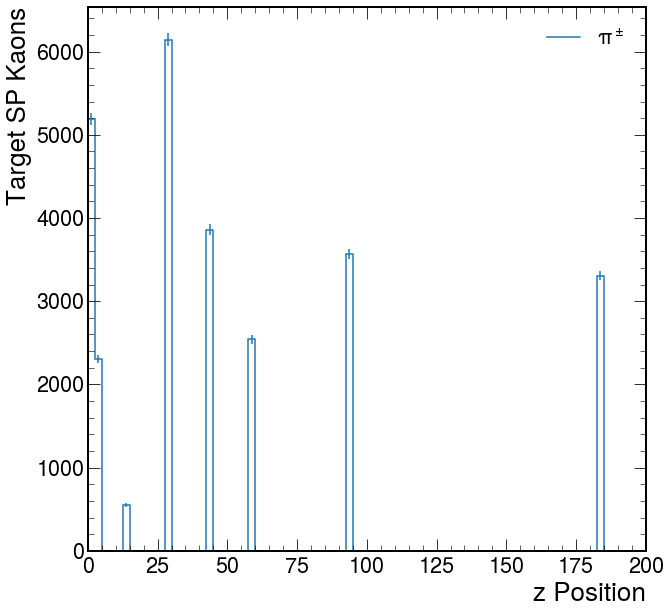

In [7]:
print(hists["Target_pion_z"])
fig, ax = plt.subplots()
hist.plot1d(hists["Target_pion_z"],ax=ax,clear=False);
leg = ax.legend([r'$\pi ^\pm$'])